In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import missingno
import seaborn as sns

In [3]:
dataset = pd.read_csv('train.csv')  
test = pd.read_csv('test.csv')

In [4]:
dataset.head() #view first 5 lines

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dataset.shape

(891, 12)

In [6]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Finding the missing values**

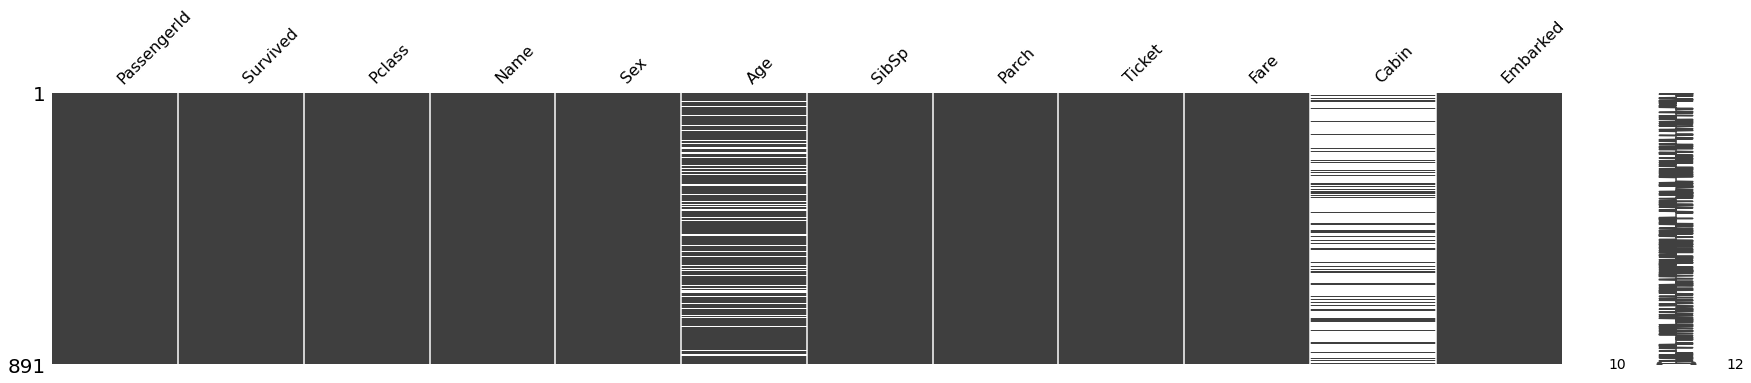

In [7]:
missingno.matrix(dataset, figsize = (30,5))

In [8]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Creating two new data frames**

In [9]:
df_bin = pd.DataFrame()
df_con = pd.DataFrame()

**How many people survived?**

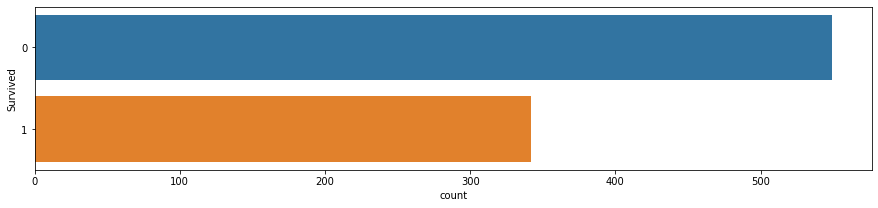

In [10]:
fig = plt.figure(figsize = (15,3)) #to adjust the size
sns.countplot(y ='Survived', data = dataset)

In [11]:
print(dataset.Survived.value_counts())

0    549
1    342
Name: Survived, dtype: int64


In [12]:
df_bin['Survived'] = dataset['Survived']

In [13]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


**Creating matrix of features X and the dependent variable** **y**

In [14]:
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values

In [15]:
print(X)

[[3 'Braund, Mr. Owen Harris' 'male' ... 7.25 nan 'S']
 [1 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)' 'female' ...
  71.2833 'C85' 'C']
 [3 'Heikkinen, Miss. Laina' 'female' ... 7.925 nan 'S']
 ...
 [3 'Johnston, Miss. Catherine Helen "Carrie"' 'female' ... 23.45 nan 'S']
 [1 'Behr, Mr. Karl Howell' 'male' ... 30.0 'C148' 'C']
 [3 'Dooley, Mr. Patrick' 'male' ... 7.75 nan 'Q']]


In [16]:
X =np.delete(X,[1,8],1)

In [17]:
X.shape


(891, 8)

In [18]:
X[0]

array([3, 'male', 22.0, 1, 0, 'A/5 21171', 7.25, 'S'], dtype=object)

In [19]:
X[0][5] #first row, fifth column

'A/5 21171'

In [20]:
X =np.delete(X,5,1)

In [21]:
X[0]

array([3, 'male', 22.0, 1, 0, 7.25, 'S'], dtype=object)

In [22]:
X.shape

(891, 7)

In [23]:
X[0]

array([3, 'male', 22.0, 1, 0, 7.25, 'S'], dtype=object)

In [24]:
df = pd.DataFrame(X)

In [25]:
df.head()

,0,1,2,3,4,5,6
0,3,male,22.0,1,0,7.25,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.925,S
3,1,female,35.0,1,0,53.1,S
4,3,male,35.0,0,0,8.05,S


**Filling the missing values**

In [26]:
print(X)

[[3 'male' 22.0 ... 0 7.25 'S']
 [1 'female' 38.0 ... 0 71.2833 'C']
 [3 'female' 26.0 ... 0 7.925 'S']
 ...
 [3 'female' nan ... 2 23.45 'S']
 [1 'male' 26.0 ... 0 30.0 'C']
 [3 'male' 32.0 ... 0 7.75 'Q']]


In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,[2]])
X[:,[2]]= imputer.transform(X[:,[2]])

In [28]:
print(X)

[[3 'male' 22.0 ... 0 7.25 'S']
 [1 'female' 38.0 ... 0 71.2833 'C']
 [3 'female' 26.0 ... 0 7.925 'S']
 ...
 [3 'female' 29.69911764705882 ... 2 23.45 'S']
 [1 'male' 26.0 ... 0 30.0 'C']
 [3 'male' 32.0 ... 0 7.75 'Q']]


In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X[:,[6]])
X[:,[6]]= imputer.transform(X[:,[6]])

In [30]:
print(X)

[[3 'male' 22.0 ... 0 7.25 'S']
 [1 'female' 38.0 ... 0 71.2833 'C']
 [3 'female' 26.0 ... 0 7.925 'S']
 ...
 [3 'female' 29.69911764705882 ... 2 23.45 'S']
 [1 'male' 26.0 ... 0 30.0 'C']
 [3 'male' 32.0 ... 0 7.75 'Q']]


In [31]:
df = pd.DataFrame(X)

In [32]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

**Encoding the categorical variables**

In [33]:
df.head()

,0,1,2,3,4,5,6
0,3,male,22.0,1,0,7.25,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.925,S
3,1,female,35.0,1,0,53.1,S
4,3,male,35.0,0,0,8.05,S


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])
print(X)

[[3 1 22.0 ... 0 7.25 'S']
 [1 0 38.0 ... 0 71.2833 'C']
 [3 0 26.0 ... 0 7.925 'S']
 ...
 [3 0 29.69911764705882 ... 2 23.45 'S']
 [1 1 26.0 ... 0 30.0 'C']
 [3 1 32.0 ... 0 7.75 'Q']]


In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,6])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [36]:
print(X)

[[0.0 0.0 1.0 ... 1 0 7.25]
 [1.0 0.0 0.0 ... 1 0 71.2833]
 [0.0 0.0 1.0 ... 0 0 7.925]
 ...
 [0.0 0.0 1.0 ... 1 2 23.45]
 [1.0 0.0 0.0 ... 0 0 30.0]
 [0.0 0.0 1.0 ... 0 0 7.75]]


In [37]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,1.0,0.0,0.0,1.0,1,22.0,1,0,7.25
1,1.0,0.0,0.0,1.0,0.0,0.0,0,38.0,1,0,71.2833
2,0.0,0.0,1.0,0.0,0.0,1.0,0,26.0,0,0,7.925
3,1.0,0.0,0.0,0.0,0.0,1.0,0,35.0,1,0,53.1
4,0.0,0.0,1.0,0.0,0.0,1.0,1,35.0,0,0,8.05


# Building ML Models

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

**k-Fold Cross Validation function**

In [39]:
from sklearn.model_selection import cross_val_score

def kf(est, X_train, y_train):
    
    accuracies = cross_val_score(estimator = est, X = X_train, y = y_train, cv = 10)

    return "Accuracy: {:.2f} %".format(accuracies.mean()*100) , "Standard Deviation: {:.2f} %".format(accuracies.std()*100)

**Accuracy score and confusion matrix**

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score

def cm(est, X_test, y_test):

  y_pred = est.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)

  accuracy = accuracy_score(y_test, y_pred)

  return cm, accuracy

# LOGISTIC REGRESSION

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train2, y_train)

LogisticRegression()

In [43]:
conf, accuracy = cm(classifier, X_test2, y_test)
print(conf)
print(accuracy)

[[91 15]
 [22 51]]
0.7932960893854749


In [44]:
acc_logistic, sd = kf(classifier,X_train2, y_train)
print(acc_logistic)

Accuracy: 81.05 %


In [45]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [0.25, 0.5, 0.75, 1], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] }]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search.fit(X_train2, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 81.05 %
Best Parameters: {'C': 0.5, 'solver': 'liblinear'}


In [46]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'liblinear')
classifier.fit(X_train2, y_train)

LogisticRegression(solver='liblinear')

In [47]:
kf(classifier,X_train2, y_train)

('Accuracy: 80.91 %', 'Standard Deviation: 3.31 %')

# KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train2, y_train)


KNeighborsClassifier()

In [49]:
cm(knn, X_test2, y_test)

(array([[95, 11],
        [30, 43]]), 0.770949720670391)

In [50]:
acc_knn, sd = kf(knn , X_train2, y_train)
print(acc_knn)

Accuracy: 80.76 %


# SVM

In [51]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train2, y_train)

SVC(kernel='linear', random_state=0)

In [52]:
cm(svm, X_test2, y_test)

(array([[90, 16],
        [24, 49]]), 0.776536312849162)

In [53]:
acc_svm, sd = kf(knn , X_train2, y_train)
print(acc_svm)

Accuracy: 80.76 %


# Kernel SVM

In [54]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train2, y_train)


SVC(random_state=0)

In [55]:
cm(classifier, X_test2, y_test)

(array([[100,   6],
        [ 32,  41]]), 0.7877094972067039)

In [56]:
acc_kernelSVM , sd = kf(classifier , X_train2, y_train)
print(acc_kernelSVM)

Accuracy: 83.15 %


# Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train2, y_train)

GaussianNB()

In [58]:
cm(classifier, X_test2, y_test)

(array([[87, 19],
        [30, 43]]), 0.7262569832402235)

In [59]:
acc_naive, sd = kf(classifier , X_train2, y_train)
print(acc_naive)

Accuracy: 77.53 %


# Decision tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train2, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [61]:
cm(dt, X_test2, y_test)

(array([[90, 16],
        [24, 49]]), 0.776536312849162)

In [62]:
acc_dt, sd = kf(dt , X_train2, y_train)
print(acc_dt)

Accuracy: 77.67 %


# Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train2, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [64]:
cm(rf, X_test2, y_test)

(array([[96, 10],
        [31, 42]]), 0.770949720670391)

In [65]:
acc_rf, sd = kf(rf , X_train2, y_train)
print(acc_rf)

Accuracy: 81.74 %


# PCA

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train3 = pca.fit_transform(X_train2)
X_test3 = pca.transform(X_test2)

In [67]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression(random_state = 0)
lr2.fit(X_train3, y_train)

LogisticRegression(random_state=0)

In [68]:
acc_pca, sd =kf(lr2 , X_train3, y_train)
print(acc_pca)

Accuracy: 69.23 %


# XG BOOST

In [69]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train2, y_train)

XGBClassifier()

In [70]:
acc_xg, sd = kf(classifier , X_train2, y_train)
print(acc_xg)

Accuracy: 81.89 %


# CAT BOOST

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

In [72]:
cm(classifier, X_test, y_test)

(array([[99,  7],
        [32, 41]]), 0.7821229050279329)

In [73]:
acc_cat, sd =kf(classifier , X_train, y_train)
print(acc_cat)

Streaming output truncated to the last 5000 lines.
5:	learn: 0.6595323	total: 5.64ms	remaining: 934ms
6:	learn: 0.6542173	total: 6.45ms	remaining: 915ms
7:	learn: 0.6493658	total: 7.26ms	remaining: 901ms
8:	learn: 0.6445723	total: 8.06ms	remaining: 888ms
9:	learn: 0.6387789	total: 8.93ms	remaining: 884ms
10:	learn: 0.6336005	total: 9.87ms	remaining: 888ms
11:	learn: 0.6290122	total: 11.1ms	remaining: 914ms
12:	learn: 0.6244878	total: 12.3ms	remaining: 936ms
13:	learn: 0.6197364	total: 13.1ms	remaining: 924ms
14:	learn: 0.6152223	total: 13.9ms	remaining: 915ms
15:	learn: 0.6110191	total: 14.8ms	remaining: 908ms
16:	learn: 0.6073759	total: 15.6ms	remaining: 903ms
17:	learn: 0.6031862	total: 16.4ms	remaining: 897ms
18:	learn: 0.5995984	total: 17ms	remaining: 879ms
19:	learn: 0.5956380	total: 18.3ms	remaining: 895ms
20:	learn: 0.5913955	total: 19.1ms	remaining: 888ms
21:	learn: 0.5874452	total: 19.7ms	remaining: 874ms
22:	learn: 0.5830226	total: 20.5ms	remaining: 871ms
23:	learn: 0.5793449

**All models comparison**

In [74]:
models = pd.DataFrame({
    
    'Model': ['Logistic Regression', 'KNN' , 'SVM', 'Kernel SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'PCA', 'XG Boost', 'CAT Boost'],

    'Score' : [acc_logistic, acc_knn, acc_svm, acc_kernelSVM, acc_naive, acc_dt, acc_rf, acc_pca, acc_xg, acc_cat]
    
    })


models.sort_values(by = 'Score', ascending = False)


,Model,Score
3,Kernel SVM,Accuracy: 83.15 %
9,CAT Boost,Accuracy: 83.15 %
8,XG Boost,Accuracy: 81.89 %
6,Random Forest,Accuracy: 81.74 %
0,Logistic Regression,Accuracy: 81.05 %
1,KNN,Accuracy: 80.76 %
2,SVM,Accuracy: 80.76 %
5,Decision Tree,Accuracy: 77.67 %
4,Naive Bayes,Accuracy: 77.53 %
7,PCA,Accuracy: 69.23 %


# Evaluating on Test Set

In [75]:
dataset = pd.read_csv('test.csv')

In [76]:
df = pd.DataFrame(dataset)

In [77]:
df = df.drop(columns = ['Name' ,'Cabin', 'Ticket'], axis = 1 )

In [78]:
df_sub = df.drop(columns = ['PassengerId'], axis = 1 )

In [79]:
X = df_sub.iloc[:, :].values

In [80]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,[2]])
X[:,[2]]= imputer.transform(X[:,[2]])

In [81]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X[:,[6]])
X[:,[6]]= imputer.transform(X[:,[6]])

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])
print(X)

[[3 1 34.5 ... 0 7.8292 'Q']
 [3 0 47.0 ... 0 7.0 'S']
 [2 1 62.0 ... 0 9.6875 'Q']
 ...
 [3 1 38.5 ... 0 7.25 'S']
 [3 1 30.272590361445783 ... 0 8.05 'S']
 [3 1 30.272590361445783 ... 1 22.3583 'C']]


In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,6])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [84]:
print(X)

[[0.0 0.0 1.0 ... 0 0 7.8292]
 [0.0 0.0 1.0 ... 1 0 7.0]
 [0.0 1.0 0.0 ... 0 0 9.6875]
 ...
 [0.0 0.0 1.0 ... 0 0 7.25]
 [0.0 0.0 1.0 ... 0 0 8.05]
 [0.0 0.0 1.0 ... 1 1 22.3583]]


In [85]:
y_pred = classifier.predict(X)

In [86]:
print(y_pred)

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0]


In [105]:
df_result = pd.DataFrame(y_pred)

In [106]:
df_result.head()

,0
0,0
1,0
2,0
3,0
4,0


In [104]:
df = pd.DataFrame()

df['PassengerId'] = dataset['PassengerId']

In [108]:
df['Survived'] = df_result[0]

In [110]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [111]:
sub = pd.read_csv('gender_submission.csv')

In [112]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [116]:
from google.colab import files

df.to_csv('output.csv', encoding = 'utf-8-sig', index = False ) 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>